## Part 1
### Data Preprocessing

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
#importing the dataset
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [85]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [86]:
train_set=df.iloc[:,1:2].values

In [87]:
train_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [88]:
#Feature Scaling using Normalization
from sklearn.preprocessing import MinMaxScaler

In [89]:
sc = MinMaxScaler()
train_set=sc.fit_transform(train_set)

In [90]:
#Train test split
x_train = train_set[:-1]
y_train = train_set[1:]

In [91]:
#Reshaping vectors to accommodate Keras RNN
x_train=np.reshape(x_train,(1257,1,1))

## Part 2
### Building the RNN

In [92]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
regressor = Sequential()

In [94]:
#Adding input LSTM layer
regressor.add(LSTM(units=5,activation='sigmoid',input_shape=(None,1)))

In [95]:
#output layer
regressor.add(Dense(units=1))

In [96]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,batch_size=64,epochs=150)

Epoch 1/150
1257/1257 [==============================] - 0s - loss: 0.3029     
Epoch 2/150
1257/1257 [==============================] - 0s - loss: 0.2545     
Epoch 3/150
1257/1257 [==============================] - 0s - loss: 0.2137     
Epoch 4/150
1257/1257 [==============================] - 0s - loss: 0.1803     
Epoch 5/150
1257/1257 [==============================] - 0s - loss: 0.1532     

## Predicting stock prices of Google in Jan 2017

In [97]:
df2=pd.read_csv('Google_Stock_Price_Test.csv')
test_set=df2.iloc[:,1:2].values

In [98]:
inputs=test_set
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,[np.shape(test_set)[0],1,1])

In [99]:
predictions = regressor.predict(inputs)

In [100]:
predictions = sc.inverse_transform(predictions)
print(predictions)

[[ 778.78845215]
 [ 788.10534668]
 [ 785.8817749 ]
 [ 794.83190918]
 [ 805.68280029]
 [ 807.10406494]
 [ 804.31976318]
 [ 806.40319824]
 [ 806.73419189]
 [ 806.3447876 ]
 [ 805.10839844]
 [ 804.43658447]
 [ 806.17926025]
 [ 806.51025391]
 [ 821.13208008]
 [ 828.00811768]
 [ 835.69213867]
 [ 832.78485107]
 [ 813.72113037]
 [ 796.39111328]]


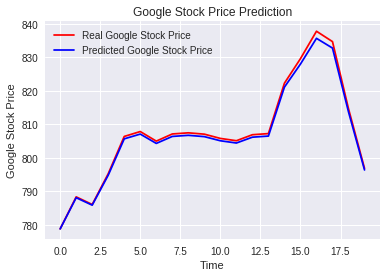

In [101]:
#Visualisation
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Homework 

In [102]:
#real stock prices for 2012-2016
df3=pd.read_csv('Google_Stock_Price_Train.csv')
test2=df3.iloc[:,1:2].values

In [103]:
pred = regressor.predict(x_train)
pred = sc.inverse_transform(pred)

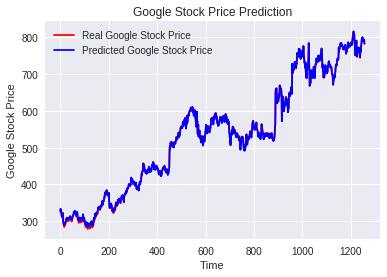

In [104]:
# Visualising the results
plt.plot(test2, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()